## ARIMA Model

In [2]:
import sys
# Make sure jupyter python path is set to root of the project directory
sys.path.insert(1, "/Users/ratikiyer/Documents/UIUC/IMC/imc_trading_2024")
import os
from packages.backtester import BackTester as backtester
from packages.logger import Logger as logger
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np

%cd ..

/Users/ratikiyer/Documents/UIUC/IMC/imc_trading_2024


##### Phase 1: create and fit ARIMA model to test data

In [3]:
df = pd.read_csv("./data/tutorial_data.csv", delimiter=";")
starfruit_price_action = df[(df["product"] == "STARFRUIT")]
amethysts_price_action = df[(df["product"] == "AMETHYSTS")]

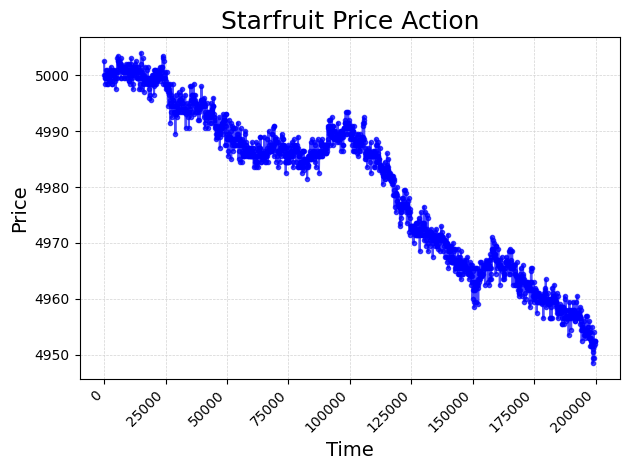

In [4]:
timestamps = starfruit_price_action["timestamp"]
starfruit_price = starfruit_price_action["mid_price"]
plt.plot(timestamps, starfruit_price, marker='o', linestyle='-', color='blue', alpha=0.7, markersize=3)
plt.xticks(color='black', rotation=45, ha='right')
plt.yticks(color='black')
plt.title('Starfruit Price Action', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<Figure size 1400x500 with 0 Axes>

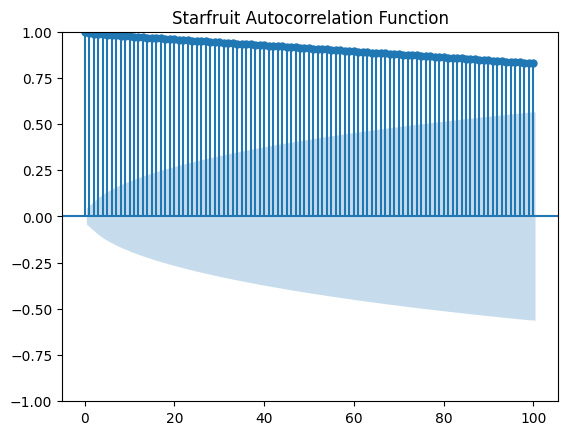

<Figure size 1400x500 with 0 Axes>

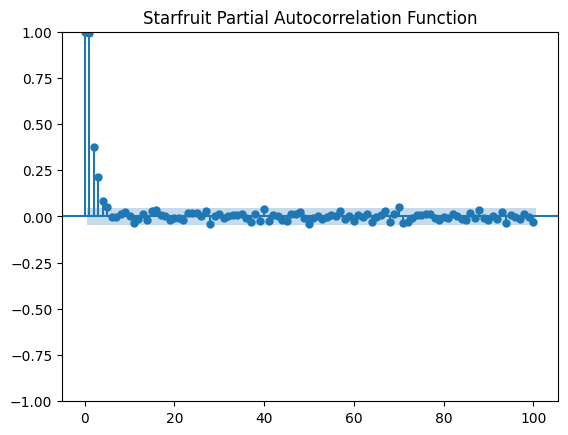

In [5]:
plt.figure(figsize=(14, 5))
plot_acf(starfruit_price, lags=100, alpha=0.05)
plt.title('Starfruit Autocorrelation Function')

plt.show()

plt.figure(figsize=(14, 5))
plot_pacf(starfruit_price, lags=100, alpha=0.05)
plt.title('Starfruit Partial Autocorrelation Function')

plt.show()

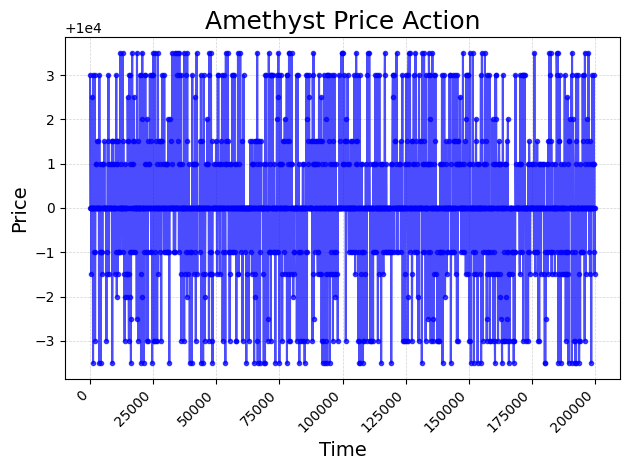

In [6]:
timestamps = amethysts_price_action["timestamp"]
amethyst_price = amethysts_price_action["mid_price"]
plt.plot(timestamps, amethyst_price, marker='o', linestyle='-', color='blue', alpha=0.7, markersize=3)
plt.xticks(color='black', rotation=45, ha='right')
plt.yticks(color='black')
plt.title('Amethyst Price Action', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Fit ARIMA model
starfruit_model = ARIMA(starfruit_price.reset_index(drop=True), order=(1, 1, 1))
arima_starfruit = starfruit_model.fit()

# Summary of the model
print(arima_starfruit.summary())

# Make forecast
print("Forecasting Results:")
forecast = arima_starfruit.forecast(steps=3)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3437.136
Date:                Wed, 03 Apr 2024   AIC                           6880.273
Time:                        04:47:23   BIC                           6897.074
Sample:                             0   HQIC                          6886.442
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0221      0.028      0.788      0.431      -0.033       0.077
ma.L1         -0.7468      0.019    -38.859      0.000      -0.784      -0.709
sigma2         1.8232      0.046     39.730      0.0